

# Project: Investigate a Dataset on TMDb Movie Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
# Set Up 
import pandas as pd
% matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load data 
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
# brief descriptive statistics of the data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning 

In [5]:
# drop the columns I am not going to use.
df.drop(['imdb_id','cast','homepage','director','tagline','overview','keywords','release_date','production_companies','budget','revenue'],axis = 1,inplace = True)

In [6]:
df.head()

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# fill the missing value for genre with 'unknown genre'
df['genres'] = df['genres'].fillna('unknown genre')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 849.0+ KB


In [9]:
# We don't necessarily need to drop any duplicates in this data set, because the only thing should be unique is 
# original_title and id, it was already unique to begin with, all the other columns are allowed to have duplicates. 

In [10]:
# To conclude, I load the data, I drop some columns I am not going to use. I performed a describe to see the data 
# in descriptive statistics, and fill the missing value under Genre columns with some value. Other than that, the data
# set was pretty clean. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What Characteristics are associated movies with high revenue? 

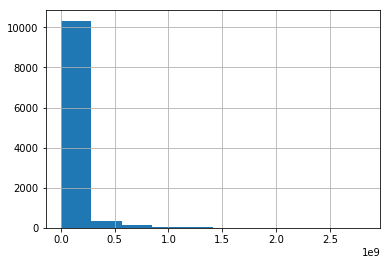

In [11]:
df['revenue_adj'].hist()

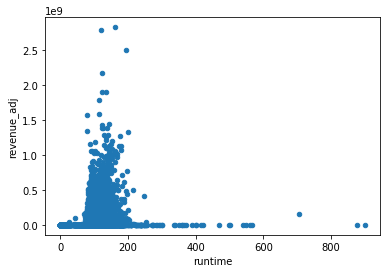

In [34]:
# runtime vs Revenue
df.plot(x = 'runtime', y ='revenue_adj',kind = 'scatter')


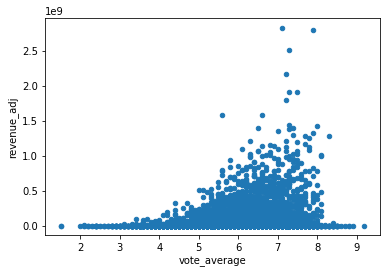

In [36]:
# vote average vs revenue 
df.plot(x = 'vote_average', y ='revenue_adj',kind = 'scatter')


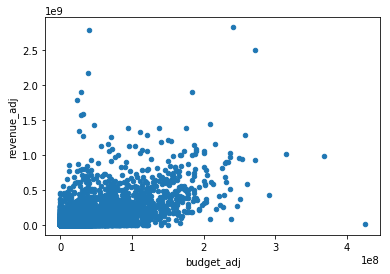

In [14]:
# budget_adj vs revenue
df.plot(x = 'budget_adj', y ='revenue_adj',kind = 'scatter')

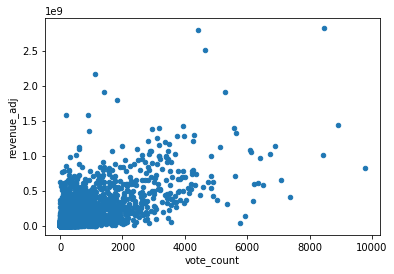

In [15]:
# vote count vs revenue 
df.plot(x = 'vote_count', y ='revenue_adj',kind = 'scatter')

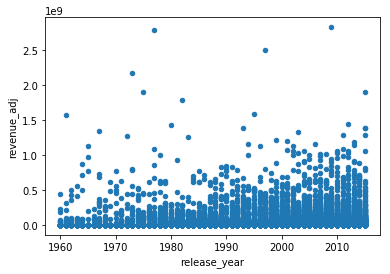

In [16]:
# release year vs revenue
df.plot(x = 'release_year', y ='revenue_adj',kind = 'scatter')

In [17]:
# Conclusion: High Revenue Movie tend to have run time around 160-170 times, and the movie votes rate of   
# 7 tend to have higher revenue, and vote counts exceed 2000 tends to have higher revenue. 

### Research Question 2  What Movie Genre is most popular from year to year? 

In [18]:
# create a new column that convert genres into form of list. 
df['genre_list'] = df['genres'].str.split('|')

In [19]:
# extract the first genre of the list of each movie and set a new column in the data frame as primary genre.
df['primary_genre'] = df['genre_list'].str[0]

In [20]:
df.head()

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_list,primary_genre
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]",Action
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]",Action
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]",Adventure
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]",Action
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]",Action


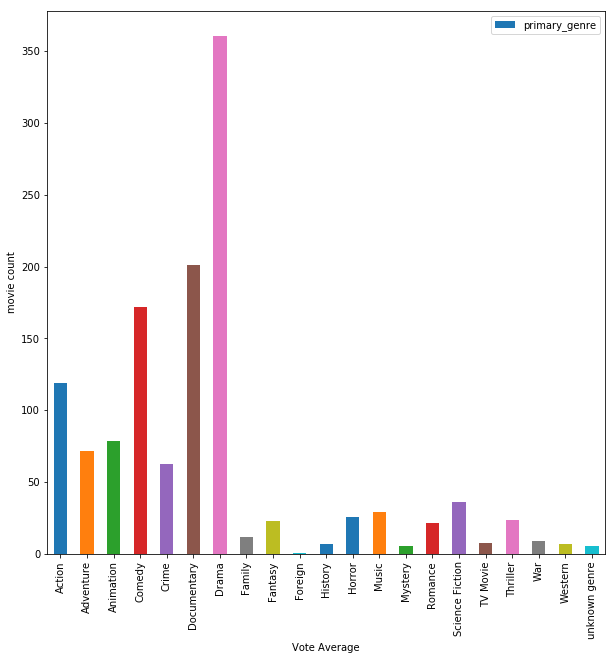

In [21]:
# bar chart on vote average distribution with action genre.
df.query('vote_average > 7')['primary_genre'].value_counts().sort_index().plot(kind = 'bar',figsize = (10,10))
plt.xlabel('Vote Average')
plt.ylabel('movie count')
plt.legend()

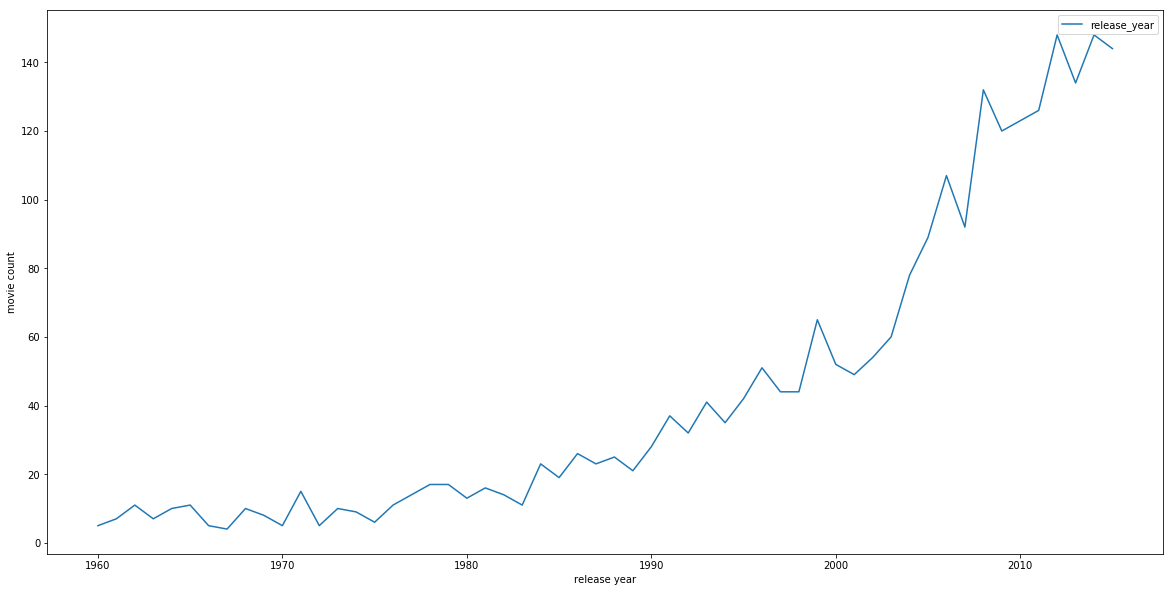

In [22]:
# bar chart on number of action genre releases by year.
df.query('primary_genre == "Drama"')['release_year'].value_counts().sort_index().plot(kind = 'line',figsize = (20,10))
plt.xlabel('release year')
plt.ylabel('movie count')
plt.legend()

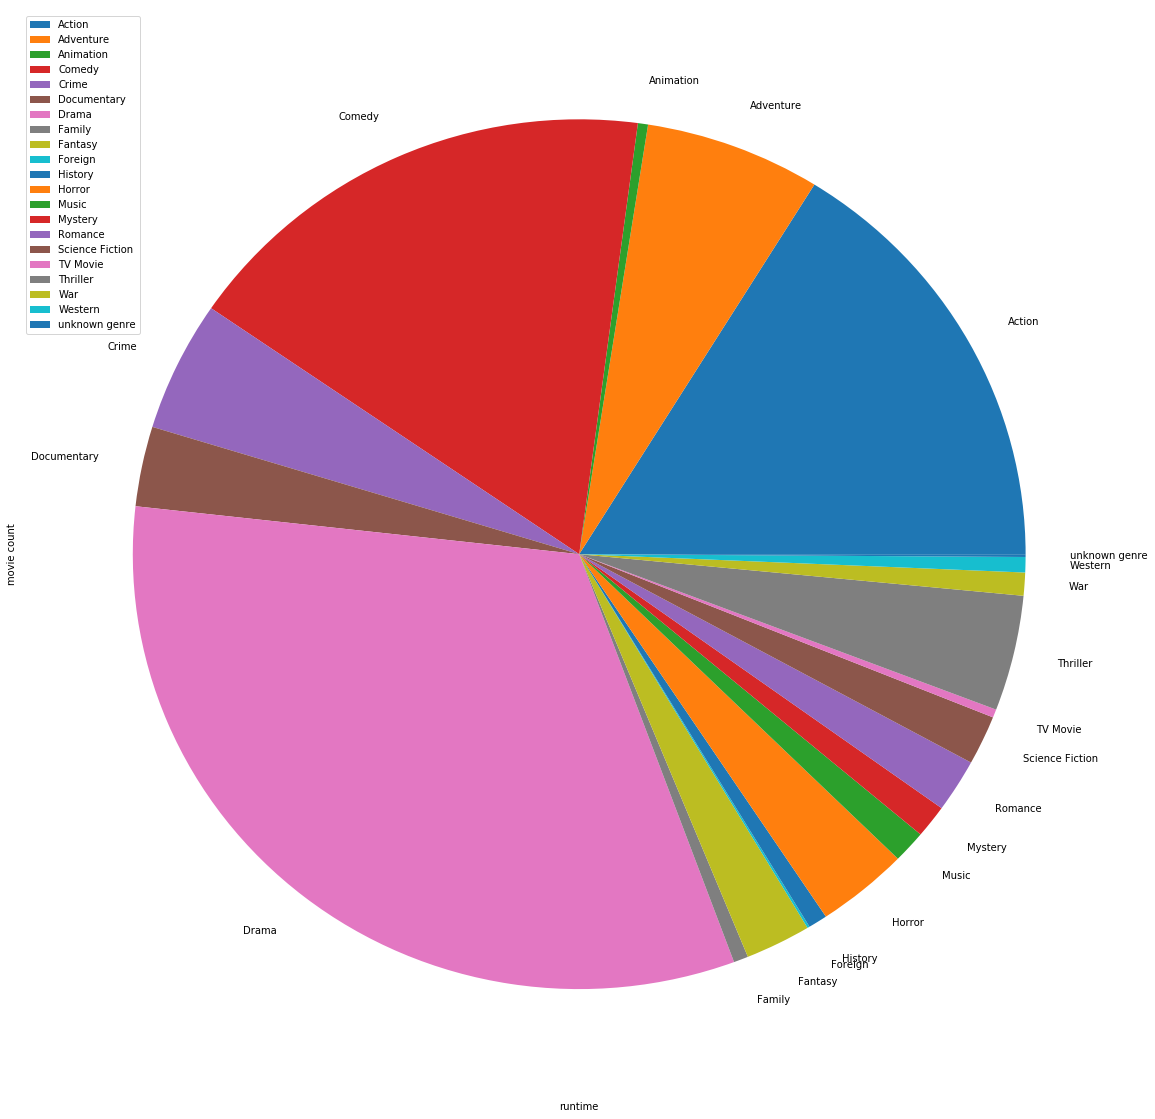

In [23]:
df.query('runtime > 100')['primary_genre'].value_counts().sort_index().plot(kind = 'pie',figsize = (20,20))
plt.xlabel('runtime')
plt.ylabel('movie count')
plt.legend(prop={'size': 10})

In [24]:
# I create a new column to be able to seperate the genre column into a list, and use non-scalar structure to seperate
# the first genre of each movie, and assume it's the primary genre of the movie. I use bar chart to find out the 
# Drama genre seem to be the most popular by vote average greater than 7. I also did a line chart and find out 
# that Drama movie rises really fast by year, it reaches peak by 2013. But that's not enough to say 
# Genre movie is the most popular genre. So I also used similar method to do a pie chart on runtime, turns out, 
# Drama hold the largest percentage of the movie that runs 100 times or more. 
# Thus, we can say Drama genre is the most popular from year to year. 

<a id='conclusions'></a>
## Conclusions
> I did this project on Movie dataset. I particular investigate two questions from this dataset. Firstly,I investigate what characteristics are associated with high revenue movie. Through Analysis, I find out High Revenue Movie tend to have run time around 160-170 times,the movie votes rate of 7 and vote counts exceed 2000 votes. Then I investigated which movie genre is popular from year to year. I used bar chart to further visulaze the data with variable number of movie release by year and different vote average count to find out that Action Genre is the most popular year by year. 
There are some flaws in my report. In the first question, there histogram indicate that I wasn't able to do a precise investigation on the high revenue characteristics, because the data is largely right skewed. All the correlation graph I find don't necessarily indicate any good relationship with revenue. In the second question, I wasn't be able to deal with multiple genre of the movie, I have to auto-assume that the first genre is the first genre, even if the data description didn't say I should assume that. By doing that, I am risking myself to misinterpret the data itself by some point. 



In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0